In [1]:
import socket
import spynnaker8 as p
from pyNN.random import NumpyRNG, RandomDistribution
from pyNN.utility.plotting import Figure, Panel
import matplotlib.pyplot as plt
import pdb
import numpy as np
from numpy import genfromtxt
import os
import time


Detected PyNN version 0.9.4 and Neo version 0.6.1


In [2]:


dt = 1           # (ms) simulation timestep
delay = 2*dt

# Architecture
n_l1 = 1 # number of cells in layer 1


# === Build the network ===

node_id = p.setup(timestep=dt, min_delay=delay, max_delay=delay)

#  100 neurons per core
p.set_number_of_neurons_per_core(p.IF_curr_exp, 100)

cell_params = {'tau_m': 20.0,
               'tau_syn_E': 5.0,
               'tau_syn_I': 5.0,
               'v_rest': -65.0,
               'v_reset': -65.0,
               'v_thresh': -50.0,
               'tau_refrac': 0.1,
               'cm': 1,
               'i_offset': 0.0
               }


2020-12-16 11:26:39 INFO: Read cfg files: /home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/jprb/.spynnaker.cfg
2020-12-16 11:26:39 INFO: Will search these locations for binaries: /home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/common_model_binaries : /home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/model_binaries
2020-12-16 11:26:39 WARNING: /home/jprb/SpiNNorse/reports has 18 old reports that have not been closed
2020-12-16 11:26:39 WARNING: /home/jprb/SpiNNorse/application_generated_data_files has 18 old reports that have not been closed
2020-12-16 11:26:39 INFO: Setting time scale factor to 1.
2020-12-16 11:26:39 INFO: Setting machine time step to 1000 micro-seconds.


['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']


In [3]:
# spike_files = os.listdir('summary/common/')
# for f in spike_files:
#     # Simulation data
#     sfn = f.replace('.csv','')
sfn = "spikes_5"
i_spikes = genfromtxt("summary/common/"+ sfn +".csv", delimiter=',')
i_indexes = np.where(i_spikes>0)

In [4]:
# Populations
print("Creating cell populations in node %s ..." % node_id)
celltype = p.IF_curr_exp
cells_l1 = p.Population(n_l1, celltype(**cell_params), label="Layer_1")

spike_train_1 = p.SpikeSourceArray(spike_times=(i_indexes))
cells_l0 = p.Population(1,spike_train_1)

# Connectivity
print("Connecting populations  in node %s ..." % node_id)
cell_conn = p.AllToAllConnector()
# w = 0.0525
w = 1.3
connections = { 'i1l1': p.Projection(cells_l0, cells_l1, cell_conn,
                        receptor_type='excitatory',
                        synapse_type=p.StaticSynapse(weight=w, delay=delay))}

# === Setup recording ===
print("Setting up recording in node %s ..." % node_id)
cells_l1.record(["v","spikes"])
cells_l0.record(["spikes"])

Creating cell populations in node 0 ...
Connecting populations  in node 0 ...
Setting up recording in node 0 ...


In [5]:
# === Run simulation ===
print("%d Running simulation..." % node_id)
p.run(len(i_spikes))

2020-12-16 11:26:39 INFO: Simulating for 200 1.0ms timesteps using a hardware timestep of 1000us
2020-12-16 11:26:39 INFO: Starting execution process
2020-12-16 11:26:39 INFO: Creating transceiver for 192.168.240.1
2020-12-16 11:26:39 INFO: Working out if machine is booted
2020-12-16 11:26:39 INFO: Found board with version [Version: SC&MP 3.2.5 at SpiNNaker:0:0:0 (built Thu Aug  1 10:15:06 2019)]
2020-12-16 11:26:39 INFO: Machine communication successful
2020-12-16 11:26:39 INFO: Detected a machine on IP address 192.168.240.1 which has 858 cores and 120.0 links
2020-12-16 11:26:39 INFO: Time 0:00:00.022924 taken by MachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2020-12-16 11:26:39 INFO: Time 0:00:00.031402 taken by PreAllocateResourcesForExtraMonitorSupport
2020-12-16 11:26:40 INFO: Time 0:00:00.000285 taken by NetworkSpecificationReport
Partitioning graph vertices
|0%                          

0 Running simulation...


2020-12-16 11:26:40 INFO: Time 0:00:00.031712 taken by MallocBasedChipIDAllocator
Inserting extra monitors into graphs
|0%                          50%                         100%|
2020-12-16 11:26:40 INFO: Time 0:00:00.040362 taken by InsertExtraMonitorVerticesToGraphs
Writing the board chip report
|0%                          50%                         100%|
2020-12-16 11:26:40 INFO: Time 0:00:00.007821 taken by BoardChipReport
Filtering edges
|0%                          50%                         100%|
2020-12-16 11:26:40 INFO: Time 0:00:00.029436 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-16 11:26:40 INFO: Time 0:00:00.039867 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-16 11:26:40 INFO: Time 0:00:00.050534 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables f

2020-12-16 11:27:02 INFO: Time 0:00:00.014724 taken by RoutingTableFromMachineReport
Generating compressed router table report
|0%                          50%                         100%|
2020-12-16 11:27:02 INFO: Time 0:00:00.006782 taken by compressedRoutingTableReports
Generating comparison of router table report
|0%                          50%                         100%|
2020-12-16 11:27:02 INFO: Time 0:00:00.006390 taken by comparisonOfRoutingTablesReport
2020-12-16 11:27:02 INFO: Running for 1 steps for a total of 200.0ms
2020-12-16 11:27:02 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-16 11:27:03 INFO: Time 0:00:00.063294 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-16 11:27:03 INFO: Time 0:00:00.029287 taken by ChipRuntimeUpdater
2020-12-16 11:27:03 INFO: Time 0:00:00.000356 taken by DatabaseInterface
2020-12-16 11:27:03 INFO

200.0

In [6]:

# === Print results to file ===

l1_voltage = cells_l1.get_data("v")
l1_spikes = cells_l1.get_data("spikes")
in_spikes = cells_l0.get_data("spikes")

# === Finished with simulator ===

p.end()
time.sleep(10)


Getting v for Layer_1
|0%                          50%                         100%|
Getting spikes for Layer_1
|0%                          50%                         100%|
Getting spikes for SpikeSourceArrayVertex_1
|0%                          50%                         100%|


In [7]:
v_array = np.array(l1_voltage.segments[0].filter(name="v")[0]).reshape(-1)
print("\n\n\n*********** v max = %0.3f *********** \n\n\n" %(max(v_array)))
np.savetxt("summary/spinnaker/" + "voltage_" + sfn + ".csv", v_array, delimiter=",")




*********** v max = -50.464 *********** 





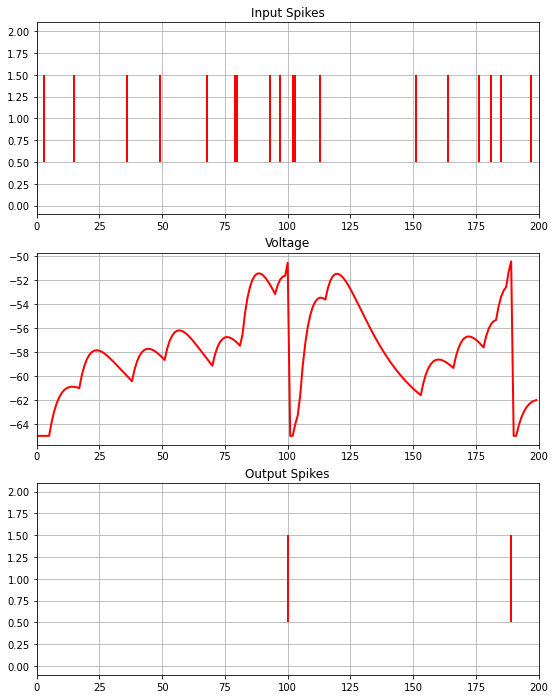

In [12]:

fig, axs = plt.subplots(3, figsize=(9,12))
# fig.suptitle('SpiNNaker')

axs[0].eventplot(np.asarray(in_spikes.segments[0].spiketrains), linewidths=2, colors='r')
axs[0].set_title("Input Spikes")
axs[0].set_xlim((0,len(i_spikes)))
axs[0].grid()

axs[1].plot(v_array, linewidth=2, color='r')
axs[1].set_title("Voltage")
axs[1].set_xlim((0,len(i_spikes)))
axs[1].grid()

axs[2].eventplot(np.asarray(l1_spikes.segments[0].spiketrains), linewidths=2, colors='r')
axs[2].set_title("Output Spikes")
axs[2].set_xlim((0,len(i_spikes)))
axs[2].grid()

fig.savefig("summary/spinnaker/" + "All_" + sfn + ".png")